**Loading the dataset and partcipants**

In [1]:
import pandas as pd

#Load the participants csv
participants_df = pd.read_csv("participants.csv")

#display the first few rows
print(participants_df.head())

  participant_id  Gender   Age  Group   MMSE  
0         sub-001       F    57      A      16
1         sub-002       F    78      A      22
2         sub-003       M    70      A      14
3         sub-004       F    67      A      20
4         sub-005       M    70      A      22


In [2]:
participants_df.columns = participants_df.columns.str.strip()
print(participants_df.columns)


Index(['participant_id', 'Gender', 'Age', 'Group', 'MMSE'], dtype='object')


In [3]:
import mne
import os

eeg_dir = "data/"

#List all the EEG files in the directory
eeg_files= [f for f in os.listdir(eeg_dir) if f.endswith(".set")]

eeg_data_dict = {}

#iterate through all the file and load EEG data
for file in eeg_files:
    subject_id = file.split("_")[0]

    #match subject id with the corresponding dignosis (group)
    #diagnosis = participants_df.loc[participants_df['participant_id'] == subject_id, 'Group'].values[0]
    diagnosis = participants_df.loc[participants_df['participant_id'] == subject_id, 'Group'].values[0]
    
    #Load the eeg data using mne with preload set to true
    eeg_data = mne.io.read_raw_eeglab(os.path.join(eeg_dir, file), preload=True) 

    #Store the eeg data and the corresponding diagnosis
    eeg_data_dict[subject_id] = {"eeg_data": eeg_data, "diagnosis": diagnosis}

#Check the strucrure of the dictionary
print(eeg_data_dict)

C:\Users\felix\AppData\Local\Temp\ipykernel_6548\1997942485.py:20: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeg_data = mne.io.read_raw_eeglab(os.path.join(eeg_dir, file), preload=True)
C:\Users\felix\AppData\Local\Temp\ipykernel_6548\1997942485.py:20: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeg_data = mne.io.read_raw_eeglab(os.path.join(eeg_dir, file), preload=True)
C:\Users\felix\AppData\Local\Temp\ipykernel_6548\1997942485.py:20: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeg_data = mne.io.read_raw_eeglab(os.path.join(eeg_dir, file), preload=True)
C:\Users\felix\AppData\Local\Temp\ipykernel_6548\1997942485.py:20: RuntimeWarning: The data contains 'boundary' events, indicat

{'sub-001': {'eeg_data': <RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MiB, data loaded>, 'diagnosis': 'A'}, 'sub-002': {'eeg_data': <RawEEGLAB | sub-002_task-eyesclosed_eeg.set, 19 x 396550 (793.1 s), ~57.5 MiB, data loaded>, 'diagnosis': 'A'}, 'sub-003': {'eeg_data': <RawEEGLAB | sub-003_task-eyesclosed_eeg.set, 19 x 153050 (306.1 s), ~22.2 MiB, data loaded>, 'diagnosis': 'A'}, 'sub-004': {'eeg_data': <RawEEGLAB | sub-004_task-eyesclosed_eeg.set, 19 x 353050 (706.1 s), ~51.2 MiB, data loaded>, 'diagnosis': 'A'}, 'sub-005': {'eeg_data': <RawEEGLAB | sub-005_task-eyesclosed_eeg.set, 19 x 402050 (804.1 s), ~58.3 MiB, data loaded>, 'diagnosis': 'A'}, 'sub-006': {'eeg_data': <RawEEGLAB | sub-006_task-eyesclosed_eeg.set, 19 x 316200 (632.4 s), ~45.9 MiB, data loaded>, 'diagnosis': 'A'}, 'sub-007': {'eeg_data': <RawEEGLAB | sub-007_task-eyesclosed_eeg.set, 19 x 383210 (766.4 s), ~55.6 MiB, data loaded>, 'diagnosis': 'A'}, 'sub-008': {'eeg_data': <RawEEGLAB | sub

**Pre-Processing**

In [4]:
#PRE-PROCESSING
#Applying  bandpass filtering(0.5-45 hz)
eeg_data_filtered = eeg_data.filter(l_freq=0.5, h_freq=45)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


**Removing boundary events**

In [5]:
#Removing boundary events(discontinuities)
# Check the events in the dataset
events, event_id = mne.events_from_annotations(eeg_data)

# Print out the events to see the types
print("Original events:")
print(events)

Used Annotations descriptions: [np.str_('boundary')]
Original events:
[[  6800      0      1]
 [ 84840      0      1]
 [186510      0      1]
 [327790      0      1]
 [345650      0      1]
 [390540      0      1]]


In [6]:
# Remove boundary events
boundary_event_id = event_id.get('boundary')
if boundary_event_id is not None:
    events_before = events.copy()  # Save original events for comparison
    events = events[events[:, 2] != boundary_event_id]
    
    print(f"Number of events before removing boundary events: {len(events_before)}")
    print(f"Number of events after removing boundary events: {len(events)}")
    
    # Optionally, print a sample of the first few events to confirm the change
    print("First few events after boundary event removal:")
    print(events[:10])  # Print first 10 events for inspection
else:
    print("No boundary events found.")


Number of events before removing boundary events: 6
Number of events after removing boundary events: 0
First few events after boundary event removal:
[]


In [7]:
#Epoching the data
#defining the duration of each epoch(like 4 seconds)
epochs = mne.make_fixed_length_epochs(eeg_data_filtered, duration=4, preload=True)

Not setting metadata
196 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 196 events and 2000 original time points ...
0 bad epochs dropped


**Feature Extraction**

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


C:\Users\felix\OneDrive\PM BM\EEG\venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


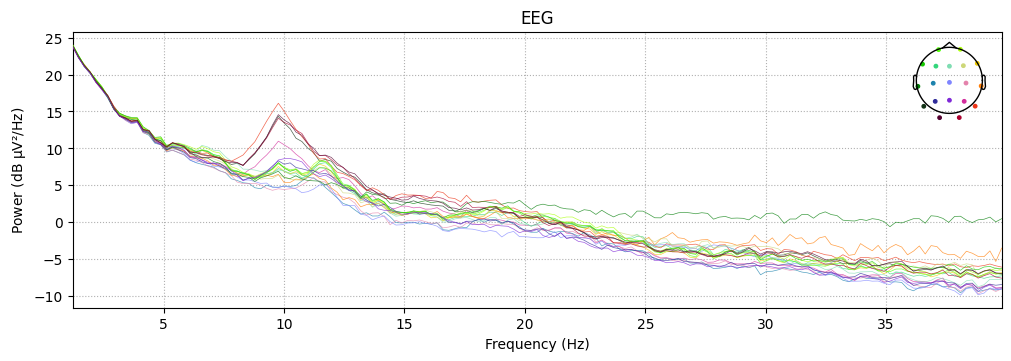

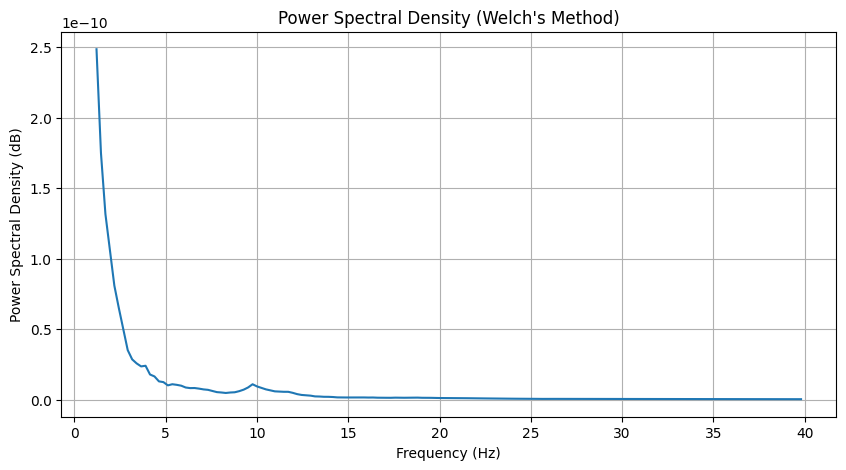

In [8]:
#Feature extraction
import matplotlib.pyplot as plt
psd = eeg_data_filtered.compute_psd(method='welch', fmin=1, fmax=40)
#psd = epochs.compute_psd(method='welch', fmin=1, fmax=40)

#Acces the psd values and frequencies
psd_values = psd.get_data() #psd values (n_channels x n_frequencies)
freqs = psd.freqs #Frequencies corresponding to the psd values

psd.plot()
#plot the psd
plt.figure(figsize=(10, 5))
plt.plot(freqs, psd_values.mean(axis=0))  # Mean across channels
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (dB)")
plt.title("Power Spectral Density (Welch's Method)")
plt.grid(True)
plt.show()

**Prepairing data for training**

In [9]:
#Prepairing data for training
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [12]:
#Reshape the EEG dataset into CNN-compatible format
X =[]
y = []

#Define label mapping for diagnosis categories
label_mapping = {'A' : 0, 'F' : 1, 'C' : 2}

for subject_id, data in eeg_data_dict.items():
    psd_values = psd_values #Extracted psd features(n_channels, n_frequencies)
    diagnosis = label_mapping[data['diagnosis']] #convert diagnosis to label

    X.append(psd_values)
    y.append(diagnosis)

In [14]:
#Converrt lists to numpy arrays
X = np.array(X) #shape (samples, channels, frequencies)
y = np.array(y) #shape (samples)

print(f"Feature matrix shape: {X.shape}")  # Expected: (88, n_channels, n_frequencies)
print(f"Labels shape: {y.shape}")  # Expected: (88,)

Feature matrix shape: (88, 19, 159)
Labels shape: (88,)


In [15]:
#Standardize the features
scaler = StandardScaler()
X_reshaped = X.reshape(X.shape[0], -1)  #Flatten for noramlization
X_reshaped = scaler.fit_transform(X_reshaped)

#reshape back for CNN input(samples, frequencies, channels)
X = X_reshaped.reshape(X.shape[0], X.shape[2], X.shape[1])


In [19]:
#One-hot encode the labels fpr CNN classification, into categorical format
y_categorical = to_categorical(y, num_classes=3)

#Split the dataset into training (80%) and testing (20%)
#X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, stratify=y, random_state=42)

#Print dataset shapes
# print(f"Training set: {X_train.shape}, Lables: {y_train.shape}")
# print(f"Testing set: {X_test.shape}, Labels: {y_test.shape}")

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, stratify=y, random_state=42)

**Data Augmentation**

In [21]:
# Data augmentation function
def augment_eeg_data(eeg_data, noise_factor=0.01):
    """
    Add random noise to the EEG data for augmentation.
    """
    noise = noise_factor * np.random.normal(size=eeg_data.shape)
    return eeg_data + noise

# Apply augmentation to your dataset
X_train_augmented = np.array([augment_eeg_data(x) for x in X_train])

# Combine original and augmented data
X_train_combined = np.concatenate([X_train, X_train_augmented])
y_train_combined = np.concatenate([y_train, y_train])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train_combined, y_train_combined, test_size=0.2, stratify=y_train_combined, random_state=42
)

**Model Definition**

In [25]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Input

model = models.Sequential([
    Input(shape=(X_train_combined.shape[1], X_train_combined.shape[2], 1)),  # Shape based on your data
    layers.Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(X.shape[1], X.shape[2], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)        │ (None, 159, 19,   │         80 │
│                          │ 8)                │            │
├──────────────────────────┼───────────────────┼────────────┤
│ max_pooling2d_1          │ (None, 79, 9, 8)  │          0 │
│ (MaxPooling2D)           │                   │            │
├──────────────────────────┼───────────────────┼────────────┤
│ dropout_2 (Dropout)      │ (None, 79, 9, 8)  │          0 │
├──────────────────────────┼───────────────────┼────────────┤
│ flatten_1 (Flatten)      │ (None, 5688)      │          0 │
├──────────────────────────┼───────────────────┼────────────┤
│ dense_2 (Dense)          │ (None, 32)        │    182,048 │
├──────────────────────────┼───────────────────┼────────────┤
│ dropout_3 (Dropout)      │ (None, 32)        │          0 │
├──────────────────────────┼───────────────────┼────────────┤
│ dense_3 (Dense)          │ (None, 3)         │         99 │
└──────────────────────────┴───────────────────┴────────────┘

 Total params: 182,227 (711.82 KB)

 Trainable params: 182,227 (711.82 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#Compile the model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
               loss='categorical_crossentropy', #since it is a multiclass classification problem
               metrics=['accuracy'])

**Computing class weights**

In [27]:
#Compute class weights
from sklearn.utils.class_weight import compute_class_weight

# Convert one-hot encoded labels back to integers
y_train_labels = np.argmax(y_train_combined, axis=1)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)

Class Weights: {0: np.float64(0.8045977011494253), 1: np.float64(1.2962962962962963), 2: np.float64(1.0144927536231885)}


**Training**

In [32]:
#Implementing early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])
history = model.fit(
    X_train_combined, y_train_combined,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test),
    #callbacks=[early_stopping],
    class_weight=class_weights  # Add class weights here
)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4892 - loss: 1.1047 - val_accuracy: 0.4286 - val_loss: 1.0961
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4753 - loss: 1.1074 - val_accuracy: 0.5000 - val_loss: 1.0963
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.4993 - loss: 1.0963 - val_accuracy: 0.5000 - val_loss: 1.0960
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4781 - loss: 1.1013 - val_accuracy: 0.4643 - val_loss: 1.0957
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4026 - loss: 1.1144 - val_accuracy: 0.5357 - val_loss: 1.0959
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.4805 - loss: 1.1026 - val_accuracy: 0.6429 - val_loss: 1.0960
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5269 - loss: 1.0808 - val_accuracy: 0.6071 - val_loss: 1.0958
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5438 - loss: 1.0989 - val_accuracy: 0.6071 - val_loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


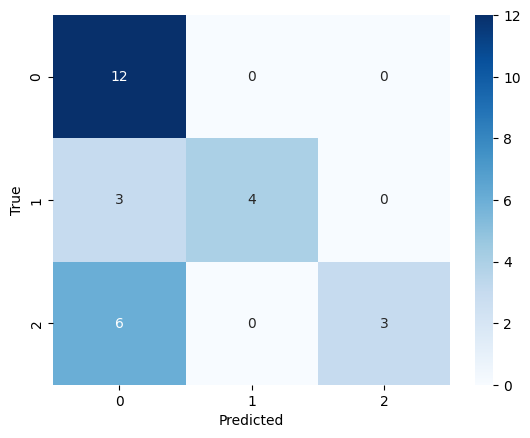

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [118]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Flatten the features
# X_flat = X.reshape(X.shape[0], -1)

# # Train a Random Forest model
# rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
# rf.fit(X_flat, y_train_labels)

# # Evaluate
# y_pred = rf.predict(X_test.reshape(X_test.shape[0], -1))
# accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
# print("Random Forest Accuracy:", accuracy)

**Evaluation**

In [34]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.6786 - loss: 1.0808
Test Loss: 1.0808191299438477
Test Accuracy: 0.6785714030265808


In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73        12
           1       1.00      0.57      0.73         7
           2       1.00      0.33      0.50         9

    accuracy                           0.68        28
   macro avg       0.86      0.63      0.65        28
weighted avg       0.82      0.68      0.65        28



In [36]:
model.save('eeg_model2.h5')

In [37]:
model.save('eeg_model2.keras')

In [ ]:
#  #Building the CNN model
# from tensorflow.keras import models, layers

# #Build the CNN model
# model = models.Sequential()

# #1st convolution layer
# model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(X.shape[1], X.shape[2], 1)))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.25))

# #2nd convolution layer
# model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.25))

# #3rd convolution layer
# model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.25))

# #Flatten the feature maps to feed into fully connected layers
# model.add(layers.Flatten())

# #Fully coonected layer
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5))

# #Output layer (3 classes: AD, FTD, CN)
# model.add(layers.Dense(3, activation='softmax'))


# #Summarize the model
# model.summary()